In [1]:
import cv2
import numpy as np
import time

# Image

### Read an image

In [18]:
img1 = cv2.imread('oldCamera.jpg',cv2.IMREAD_COLOR)
img2 = cv2.imread('oldCamera.jpg',cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('oldCamera.jpg',cv2.IMREAD_UNCHANGED)

In [19]:
cv2.imshow('image one', img1)
cv2.imshow('Image two', img2)
cv2.imshow('Image three', img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Resizable window

In [23]:
cv2.namedWindow('Image', cv2.WINDOW_NORMAL)
cv2.imshow('Image', img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Save image

In [24]:
cv2.imwrite('ColorFull.png',img2)

True

### All sum up:- load, Display and Save

In [7]:
import cv2
img = cv2.imread('oldCamera.jpg', cv2.IMREAD_UNCHANGED)
cv2.namedWindow('Image',cv2.WINDOW_NORMAL)
cv2.imshow('Image', img)
k = cv2.waitKey(0)
if k == ord('q'):
    cv2.destroyAllWindows()
if k == ord('s'):
    cv2.imwrite('ColorFull.jpg', img)
    cv2.destroyAllWindows()

### Using Matplotlib

Matplotlib is building the font cache; this may take a moment.


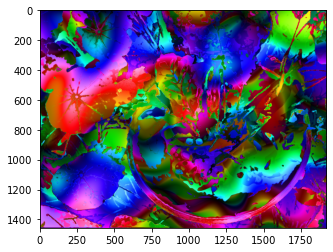

In [13]:
import matplotlib.pyplot as plt
import cv2
img = cv2.imread('oldCamera.jpg', cv2.IMREAD_COLOR)
plt.imshow(img, cmap='gray')
plt.show()

# Video

### Read Video from web-camera

In [5]:
cap = cv2.VideoCapture(0)
while True:
    rec,video = cap.read()
    cv2.namedWindow('Video', cv2.WINDOW_NORMAL)
    cv2.imshow('Video', video)
    if cv2.waitKey(10) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

### Play video from file

In [9]:
cap = cv2.VideoCapture('Bunny.mp4')
while True:
    rec, video = cap.read()
    cv2.namedWindow('Video',cv2.WINDOW_NORMAL)
    cv2.imshow('Video', video)
    if cv2.waitKey(10) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

### Conver the colour of a video

In [13]:
cap = cv2.VideoCapture(0)
while True:
    rec, frame = cap.read()
    grayFrame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.namedWindow('Video', cv2.WINDOW_NORMAL)
    cv2.imshow('Video', grayFrame)
    if cv2.waitKey(10) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

### Save video

In [22]:
cap = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0,(640,480))

while (cap.isOpened()):
    rec, frame = cap.read()
    if rec == True:
        out.write(frame)
        cv2.imshow('frame',frame)
        if cv2.waitKey(10) == ord('q'):
            break
    else:
        break
cap.release()
out.release()
cv2.destroyAllWindows()

# Draw Shapes

### Draw line

In [91]:
img = np.zeros((512,512,3), np.uint8)
img = cv2.line(img,(0,0),(512,512),(255,0,0),3)
cv2.imshow('Draw Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Draw Rectangle

In [16]:
img = np.zeros((512,512,3),np.uint8)
img = cv2.rectangle(img,(0,0),(50,50),(255,0,0),3)
cv2.imshow("Rectangle", img)
cv2.waitKey(0)
cv2.destroyAllWindows()### Draw line

### Draw Circle

In [50]:
img = np.zeros((512,512,3), np.uint8)
img = cv2.circle(img, (347,70), 43,(0,0,255),3)
cv2.imshow("Circle", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Draw Ellipse

In [78]:
img = np.zeros((255,255,3),np.uint8)
img = cv2.ellipse(img,(150,100),(50,25),0,0,250,(0,0,255),-1)
cv2.imshow("Elipse",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Draw ploygon

In [95]:
img = np.zeros((255,255,3),np.uint8)
pts = np.array([[25, 70],[25,160],[160,160],[160,70]], np.int32)
pts = pts.reshape(-1,1,2)
img = cv2.polylines(img, [pts], True, (0,255,255))
cv2.imshow('Polygon',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Adding text to image

In [ ]:
img = np.zeros((150,400,3),np.uint8)
font= cv2.FONT_HERSHEY_SIMPLEX
img = cv2.putText(img,'A Learner',(25,100),font,2,(255,0,255),2,cv2.LINE_AA)
cv2.imshow("Text",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Mouse Event

Create rectangle by clicking mouse button

In [9]:
def draw_rectangle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.rectangle(img,(x,y),(x+20,y+30),(255,0,0),-1)
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_rectangle)

while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(1) == ord('q'):
        break
cv2.destroyAllWindows()

Create circle by clicking mouse button

In [7]:
def draw_circle(event,x,y, flags, param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y),50,(0, 0, 255), -1)

img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_circle)
while True:
    cv2.imshow('image',img)
    if cv2.waitKey(1) == ord('q'):
        break
cv2.destroyAllWindows()

In [13]:
# Draw a rectangle dragging carsore 
drawing = False
mode = True
ix,iy = -1,-1
def draw_circle(event, x, y, flags, param):
    global drawing, mode, ix, iy
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img,(ix,iy), (x,y), (0, 255, 255), -1)
            else:
                cv2.circle(img, (x,y), 5, (255, 255, 0), -1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == False:
            cv2.rectangle(img,(ix, iy), (x,y), (0, 255, 255), -1)
        else:
            cv2.circle(img, (x,y), 5, (255, 255, 0), -1)
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_circle)
while True:
    cv2.imshow('image', img)
    if cv2.waitKey(1) == ord('q'):
        break
cv2.destroyAllWindows()

### Trackbar as the Color Palette

In [4]:
def nothing(x):
    pass
img = np.zeros((412, 650, 3), np.uint8)
cv2.namedWindow('image')

cv2.createTrackbar('R', 'image', 0, 255, nothing)
cv2.createTrackbar('G', 'image', 0, 255, nothing)
cv2.createTrackbar('B', 'image', 0, 255, nothing)

switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image',0,1,nothing)
while True:
    cv2.imshow('image', img)
    if cv2.waitKey(1) == ord('q'):
        break
    
    r = cv2.getTrackbarPos('R', 'image')
    g = cv2.getTrackbarPos('G', 'image')
    b = cv2.getTrackbarPos('B', 'image')
    s = cv2.getTrackbarPos(switch, 'image')
    
    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]
cv2.destroyAllWindows()